# Q1 A non neural network approach to your to ML

Import librarys and functions needed for this problem

In [158]:
import functions
import importlib
importlib.reload(functions)
from functions import *

In [159]:
# Librays that are imported 
import pandas as pd
import numpy as np

# Visulise data
from matplotlib import pyplot as plt
import seaborn as sns

# Create Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Used to find the best tree depth
from sklearn.model_selection import cross_validate

## Load dataset
palmerpenguins_extended.csv    
link: https://www.kaggle.com/datasets/samybaladram/palmers-penguin-dataset-extended?select=palmerpenguins_extended.csv

The data set that is going to be used is the palmerpenguins_extended dataset which contains the research information about 3 different species of penguins.
The model that is going to be made is a decision tree that will try and predict the class in this case species of a penguin.

In [160]:
# File path of were dataset is saved
Path = "C:/Users/Billy/Documents/University/Year 4/Comp/CW2/palmerpenguins_extended.csv"
df_penguin = get_data(Path)
# Use .head() to see all the different collumns of the dataset
df_penguin.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,health_metrics,year
0,Adelie,Biscoe,53.4,17.8,219.0,5687.0,female,fish,adult,overweight,2021
1,Adelie,Biscoe,49.3,18.1,245.0,6811.0,female,fish,adult,overweight,2021
2,Adelie,Biscoe,55.7,16.6,226.0,5388.0,female,fish,adult,overweight,2021
3,Adelie,Biscoe,38.0,15.6,221.0,6262.0,female,fish,adult,overweight,2021
4,Adelie,Biscoe,60.7,17.9,177.0,4811.0,female,fish,juvenile,overweight,2021


In [161]:
# Find the different unique entries in each collumn containing text
col = ['species','island','sex','diet','life_stage','health_metrics','year']
for i in range(7):
    print(col[i],":",df_penguin[col[i]].unique())

species : ['Adelie' 'Chinstrap' 'Gentoo']
island : ['Biscoe' 'Dream' 'Torgensen']
sex : ['female' 'male']
diet : ['fish' 'krill' 'parental' 'squid']
life_stage : ['adult' 'juvenile' 'chick']
health_metrics : ['overweight' 'healthy' 'underweight']
year : [2021 2022 2023 2024 2025]


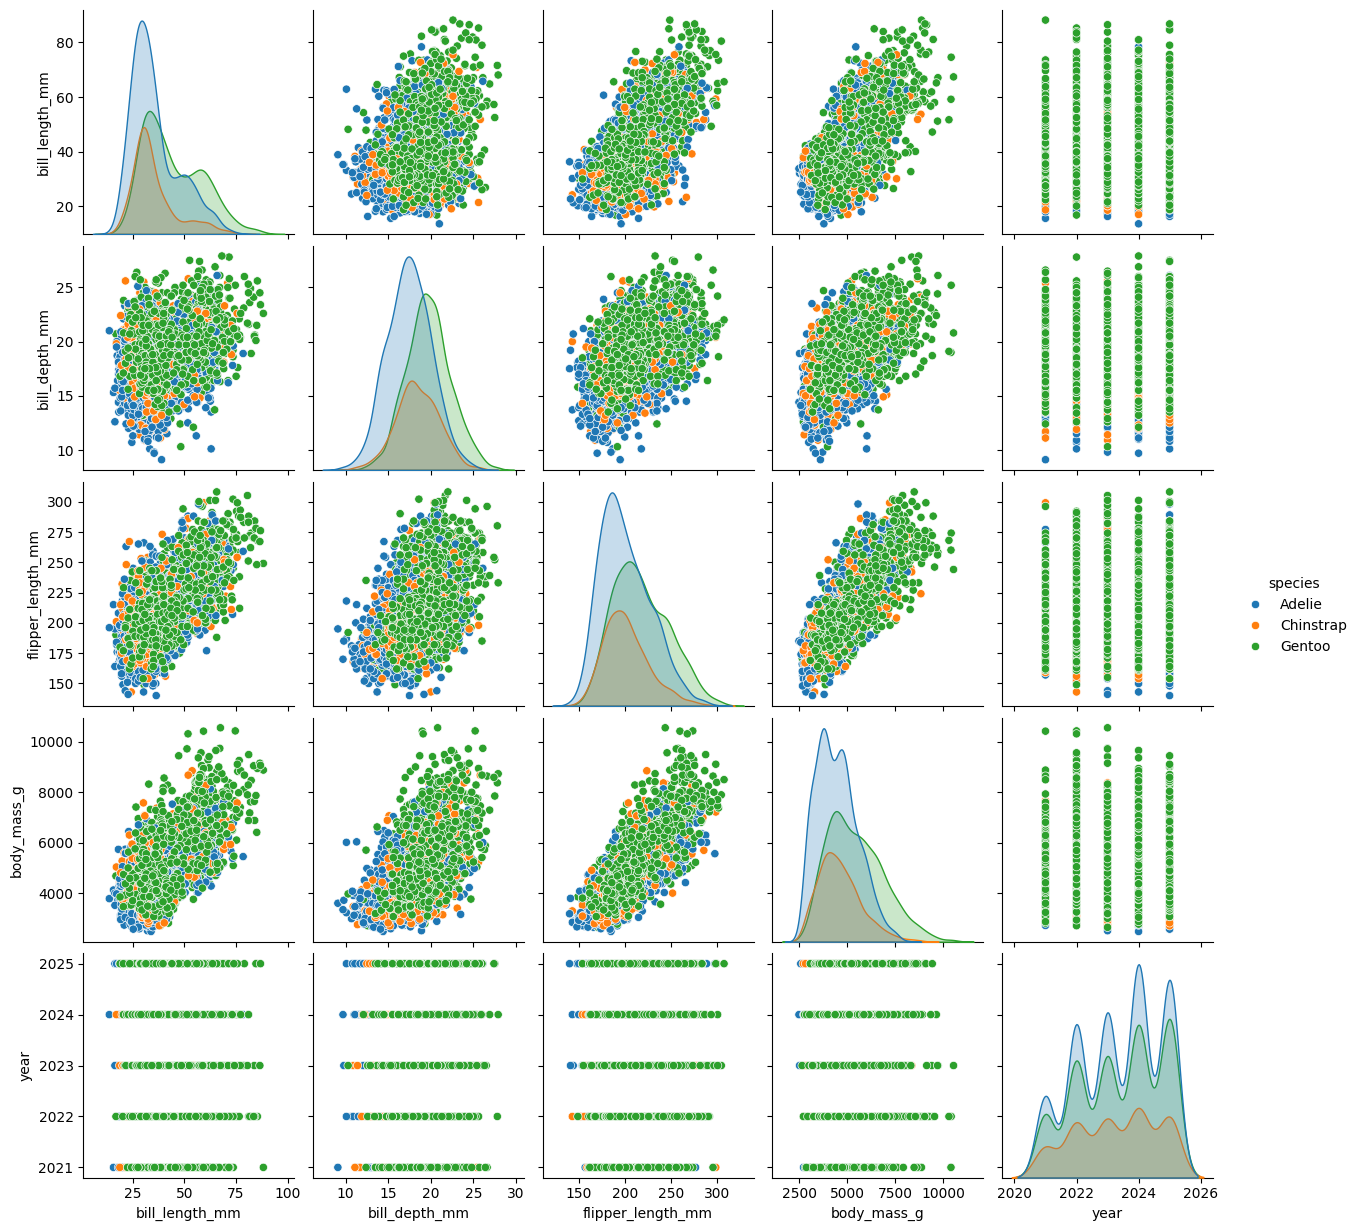

In [ ]:
# Use pairplot to plot each feature agaisnt each other to see if there is any trend between them and the 3 species
# Additionally see if there is a feature that doesnt have an impact on species
sns.pairplot(df_penguin,hue='species')

## Cleaning the data in the Penguin dataset

In [180]:
df_penguin = augment_data(df_penguin);
# Augment_data is a function imported from functions.py
# Augment_data takes the dataframe and changes the text in each collumn into numbers so that it can be used when fiting to a descion tree

# From looking at the pairplot you could see that the year doesnt have a clear impact on the species. So the function remvoes it from the dataset
# so it wont be used when training/testing the model
# The other features at left in as you can see that they differ between classes
df_penguin.head()

KeyError: "['year'] not found in axis"

In [ ]:
# To train and test a classifier model you need to split your data into a training and test set
# To do this use the datasplit_train_test() imported function

# datasplit_train_test takes a dataset and seperates the features (X) and target (y) of the data. In this case the target is the species.
# Next it will normalise the features.
# Lastly it makes sets of data for training and testing the classifer. In this case it will be 70% training and 30% test data.

# The reason that a 70-30 split is used is because one class has a smaller number of entries then the other.
# To have more of this class when testing a larger split is used on the testing data at 30%
Xtrain, Xtest, ytrain, ytest = datasplit_train_test(df_penguin)


In [165]:
# make feature dataset by removing class collumn
X = df_penguin.drop('species',axis=1)
# Create target dataset containing class collumn
y = pd.DataFrame(df_penguin.species)

# Scale feature dataset using standard scaler
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
X_scale = pd.DataFrame(X_scale,columns=X.columns)

# Using target and feature data split into training and test data 
Xtrain, Xtest, ytrain, ytest = train_test_split(X_scale, y, test_size=0.4, random_state=42,shuffle=True)

## Creating decision tree

In [168]:
# Create Decison tree classifier model called 'DecisionTree'
DecisionTree = DecisionTreeClassifier()
# Train the model by fitting the X and y training data to model
DecisionTree = DecisionTree.fit(Xtrain,ytrain)

Testing accuracy of model using test data

In [169]:
# using X test data see what species the model will predict
yPred = DecisionTree .predict(Xtest)

# Test model on unseen data. Which will be Xtest and ytest
# This will find the accuracy of the prediction of the class compared to actual class
test_accuracy = DecisionTree.score(Xtest, ytest)

# Test model on seen data. Which will be Xtrain and ytrain from when the model was first trained.
# This let us see if the accuracy with unseen data is low if the reason is over-fitting.
train_accuracy = DecisionTree.score(Xtrain, ytrain)
print(f"Training accuracy on {train_accuracy}")
print(f"Testing accuracy on {test_accuracy}")

Training accuracy on 1.0
Testing accuracy on 0.7448979591836735


See Parameters of trained decision Tree

In [170]:
#n_nodes tells us the depth of the decision tree 
n_nodes = DecisionTree.get_depth()
# n_leaves is all the possible outcomes of the decision tree
n_leaves = DecisionTree.get_n_leaves()
# model_params will show all the other parameters of the Decision tree
model_params = DecisionTree.get_params()

# model_params is of type dictonary so to make it easier display/read. We make it into a datadrame.
model_params_df_dt_clf = pd.DataFrame([model_params]).T
print(f"nodes: {n_nodes},")
print(f"leaves: {n_leaves},")
print(f"model parameters:")
display(model_params_df_dt_clf)
print("\n")

nodes: 26,
leaves: 360,
model parameters:


,0
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0
min_samples_leaf,1
min_samples_split,2
min_weight_fraction_leaf,0.0


Plotting Decision Tree

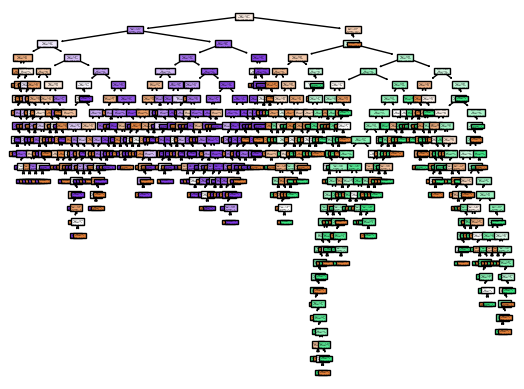

In [171]:
# Plotting the decision tree lets you see what decision the tree makes at each step to make a prediction
fig = plt.figure()
tree.plot_tree(DecisionTree, filled=True)
plt.show()

## Finding the best max depth
1. Reduce the size of decision tree plot
2. educe computational time needed to train the model

In [172]:
# Find the depth to use on the model by using cross validate
# Cross validate finds the dpeth were the model doesnt over fit to the training data but also that trains it enough

# Tree depths to try
m = np.linspace(1,50,50,dtype=int)
# List of cross validation scores
data = []
# Loop through each depth
for i in m:
  # Create model at depth m
  clfm = DecisionTreeClassifier(random_state=0,max_depth=i)
  # Cross validate model
  cv_results = cross_validate(clfm, Xtrain, ytrain, cv=10)
  # Get score 
  scores = cv_results['test_score']
  # Calculate error rate using score
  error_rate = 1- scores.mean()
  # Add score to data list with the depth
  data.append([i,error_rate])
print(data)

[[np.int64(1), np.float64(0.33624437603599344)], [np.int64(2), np.float64(0.2964006630357565)], [np.int64(3), np.float64(0.2657660430973242)], [np.int64(4), np.float64(0.27354487331281085)], [np.int64(5), np.float64(0.2642907885389534)], [np.int64(6), np.float64(0.2643073644328676)], [np.int64(7), np.float64(0.25993132843949807)], [np.int64(8), np.float64(0.24924224484963298)], [np.int64(9), np.float64(0.24730049727681747)], [np.int64(10), np.float64(0.2463248875207199)], [np.int64(11), np.float64(0.25218091404215026)], [np.int64(12), np.float64(0.2546128344778593)], [np.int64(13), np.float64(0.2526639829505092)], [np.int64(14), np.float64(0.25801089273028655)], [np.int64(15), np.float64(0.25606677717262616)], [np.int64(16), np.float64(0.26238219275396646)], [np.int64(17), np.float64(0.25702817901965436)], [np.int64(18), np.float64(0.26335306654037416)], [np.int64(19), np.float64(0.26140184702817904)], [np.int64(20), np.float64(0.26383850343357806)], [np.int64(21), np.float64(0.2638361

9


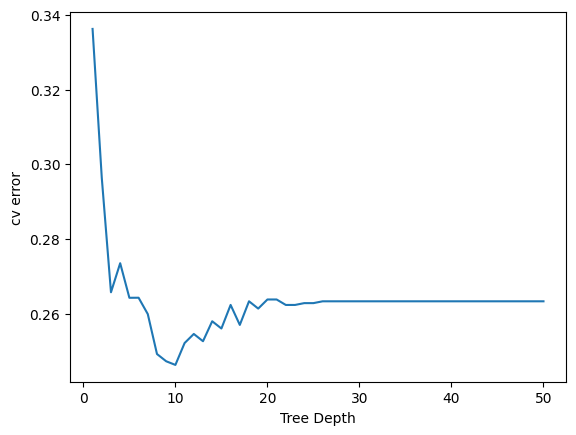

In [173]:
# To make the depth easier to see plot the error rate for each depth on a graph
data = np.array(data)
treedepth = (data[:,0]).astype(dtype=int)
cverr = (data[:,1])
plt.figure
plt.plot(treedepth,cverr)
plt.xlabel("Tree Depth")
plt.ylabel("cv error")

# Find best depth by using depth at lowest error rate
print(np.argmin(cverr))


## retraining model

In [174]:
# Now using the depth found previously train a new Decision tree with a max depth of 9
DecisionTree_reduced = DecisionTreeClassifier(max_depth=9)
DecisionTree_reduced = DecisionTree_reduced.fit(Xtrain,ytrain)

In [175]:
# Find the accuracy of the new model on the training and test data
train_accuracy = DecisionTree_reduced.score(Xtrain, ytrain)
test_accuracy = DecisionTree_reduced.score(Xtest, ytest)
print(f"Training accuracy on {train_accuracy}")
print(f"Testing accuracy on {test_accuracy}")

Training accuracy on 0.891642371234208
Testing accuracy on 0.749271137026239


In [176]:
# Although the accuracy of the testing data only went up by a small amount it may have changed the accuracy for the individual classes
# This can be seen it raised class 1 from 56% to 73% accuracy which is alot better
# although it did reduce class 0 from 71% to 63% its better to have similar accuracy between the 3 classes
for i in range(3):
    Xtest_class = Xtest[ytest['species'] == i]
    data_len = len(Xtest_class)
    ytest_class = pd.DataFrame([i]*data_len,columns=ytest.columns)

    reducedAccuracy = DecisionTree_reduced.score(Xtest_class,ytest_class)
    originalAccuracy = DecisionTree.score(Xtest_class,ytest_class)
    print(f"Class {i}")
    print(f"Reduced model accuracy: {reducedAccuracy}")
    print(f"original model accuracy: {originalAccuracy}")
    print("")

Class 0
Reduced model accuracy: 0.6384
original model accuracy: 0.7152

Class 1
Reduced model accuracy: 0.7447698744769874
original model accuracy: 0.5774058577405857

Class 2
Reduced model accuracy: 0.8877952755905512
original model accuracy: 0.860236220472441



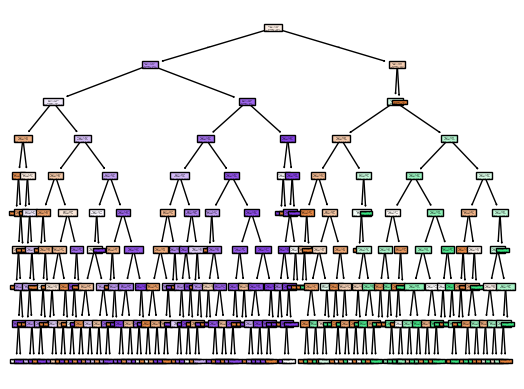

In [177]:
# Now that the models depth has been reduced it can be replotted to see the shape of the tree
fig = plt.figure()
tree.plot_tree(DecisionTree_reduced, filled=True)
plt.show()

## Importance of each feature in the Decision tree model

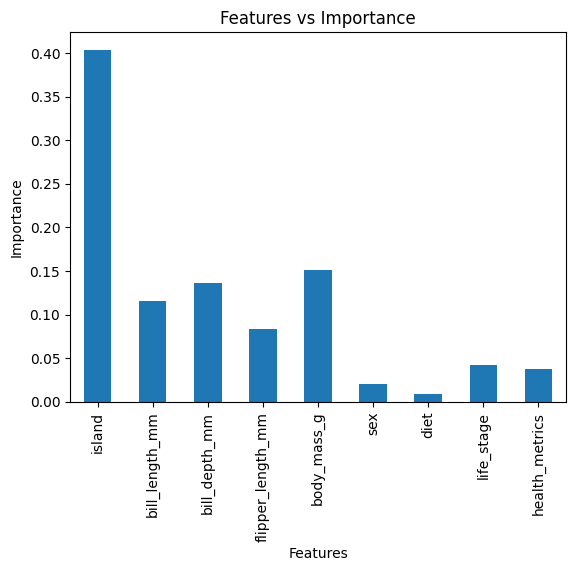

In [178]:
# Feature importance tells you how much of an impact each feature from the data had on the making predictions
# Plot feature importance on a bar chart for easier comparison between classes
importances = DecisionTree.feature_importances_
features = Xtrain.columns
featureImportance = pd.Series(importances,index=features)
featureImportance.plot.bar()
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Features vs Importance");

# If the model did take a long time to train you could look at which feature had the smallest impact 
# and choose to not include it when training a model. This would reduce the time taken when training.

# The 2 features in this dataset that might be removed would be sex and diet and if that wasnt enough 
# reduction then life_stage and health_metrics.